# 결측치와 누락값 & 이상치

### 데이터 분석에서 결측치와 누락값은 정말 중요한 포인트입니다.
- 결측치 : 실제 Na 값이지만 정말 Na값일 수 있다. 서베이 설문조사 -> 결측치가 순수하게 결측치 or na값 자체가 값일 수 있다
- 누락값 : 휴먼에러로 인한 누락값, 어떤 이유로 누락이 되었는지?
- 공통적으로 이야기하는 겂은? 값이 없다. NA, NaN 데이터에 보일 것

- 결측치 & 누락값 왜 처리하려고 하는가?
- 분석에 방해가 된다. but na값이 인사이트가 될 수 있다.
- na 결측치, 누락값이라 생각한다면 -> 머신에게 학습시키기 위해

- na값이 왜 중요한가?
- 시험성적데이터 [100, 50, 60, 30, 50, 30] 이 데이터를 알고 평균을 알 수 있지만
- 시험성적데이터 [100, 50, x, x, 50, 30] 이 누락이 되었다.

- x값이 누락값이 실제의 값과 가장 유사하게 대입되면 가장 실제값과 예측값이 같아지는 것

- 결측치가 정말 중요하고 단순하게 접근해야 할 그런 범위는 아니다
- 결측치를 실제값과 유사하지 않게 적는다면 -> 결국에는 차이가 발생할 것이고 모델의 성능에도 영향을 미침
---

- 그렇다면 이런 결측치를 처리하는 방법은 무엇일까?

- 1. 가장 간단한 건 날린다. 버린다. 결측치 날린다.
    - 결측치를 날리는 기준은? 결측치가 전체 비중에 1% 미만 정도면 쉽게 날린다. 하지만 절대값에 따라 달라질 수 있다.
    
- 2. 결측치가 데이터 셋 컬럼에서 30%, 40%
    - 다 날린다면 머신에게 학습할 데이터양이 줄어드는 것 -> 성능에 영향을 미칠 수 있다
    - 결측치를 최대한 채워서 메꾸는 형식

- 3. 결측치가 데이터 셋 컬럼의 80%, 90%
    - 비즈니스적인 이해관계를 보고 도메인지식을 이용해서 날린다
---
- 결측치를 단순하게 평균으로만 대체한다면 -> 기온데이터의 경우 날씨는 계절에 대한 영향을 받기 때문에 문제가 크다
- 따라서, 결측치는 정말 다양하게 고민하고 도메인, 통계적으로 다방면 고민해야 된다
- 결측치를 나타내는 용어
- 완전 무작위 결측치 MCAR (Missing Completely at Random) : 인간의 편향, 기계 결함 x
- 무작위 결측 MAR (Missing at Random) : 어떤 상황으로 인해서 발생하는 경우, 제조과정에서 A에 문제가 발생해서 문제가 A 공정에만 발생하는 경우 
- 비무작위 결측 NMAR (Missing at Not Random)

In [2]:
pip install missingno

In [1]:
## 데이터 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

In [3]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

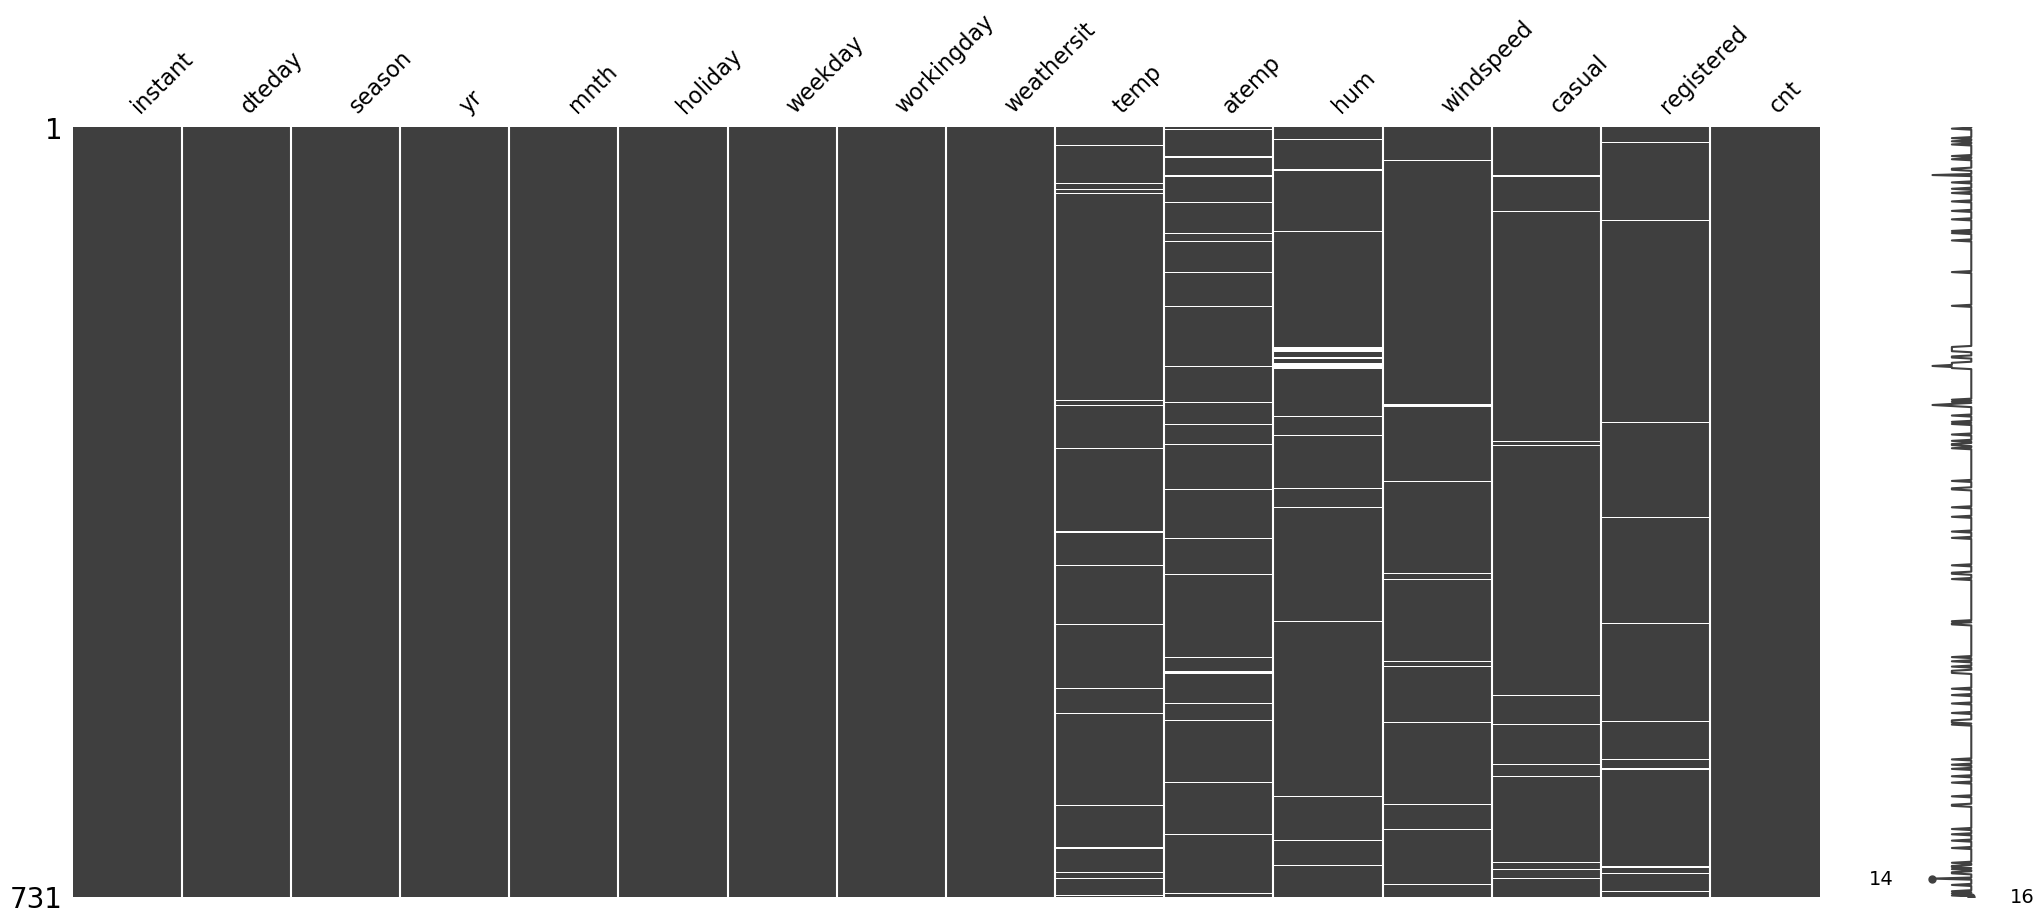

In [10]:
#결측치 시각적으로 확인
msno.matrix(df)
plt.show()

## 결측치를 대체하는 방법
- 샘플 데이터만 뽑아서 어떤 식으로 작동하는지 확인

In [23]:
dfe.head(10)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [8]:
ebola = dfe.iloc[0:15, 0:5]

- 결측치를 날리면?

In [11]:
ebola.dropna() # na값이 다 날라감

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


- fillna(method = "") 문법

In [13]:
ebola['Cases_Liberia'].mean()

7960.111111111111

In [16]:
ebola['Cases_Liberia'].fillna(7960.111111111111).to_frame() # 결측치를 특정값으로 대체

,Cases_Liberia
0,7960.111111
1,7960.111111
2,8166.000000
3,8157.000000
4,8115.000000
5,8018.000000
6,7960.111111
7,7977.000000
8,7960.111111
9,7862.000000


- ffill - 누락값이 나타나기 전 누락값을 전의 값으로 변경
- bfill - 누락값이 나타나나 누락값을 후의 값으로 변경

In [18]:
ebola['Cases_Liberia'].fillna(method = "ffill").to_frame()

# 인덱스 0,1 의 값은 앞의 값이 존재하지 않기 떄문에 그대로 결측치로 존재

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,8018.0
7,7977.0
8,7977.0
9,7862.0


In [19]:
ebola['Cases_Liberia'].fillna(method = "bfill").to_frame()

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


- 보간법 (interpolation)
- interpolate(method = "") : 누락값 사이의 값의 평균을 누락값과 대체

In [20]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [21]:
ebola['Cases_Liberia'].interpolate().to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7997.5
7,7977.0
8,7919.5
9,7862.0


### 보간법에 대해서

method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [24]:
ebola['Cases_Liberia'].interpolate(method = "dfas").to_frame()

ValueError: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'dfas' instead.

<Axes: >

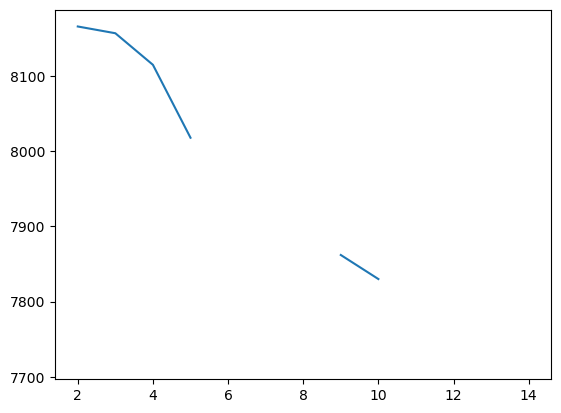

In [26]:
# 결측값이 있는 경우는 차트가 끊긴다
# 전체추세는 떨어지는 추세인데 잘못 대체하면 잘못된 해석할 수도
ebola['Cases_Liberia'].plot()

<Axes: >

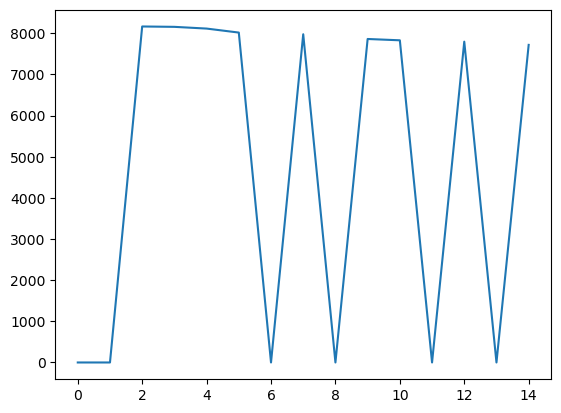

In [27]:
ebola['Cases_Liberia'].fillna(0).plot()

<Axes: >

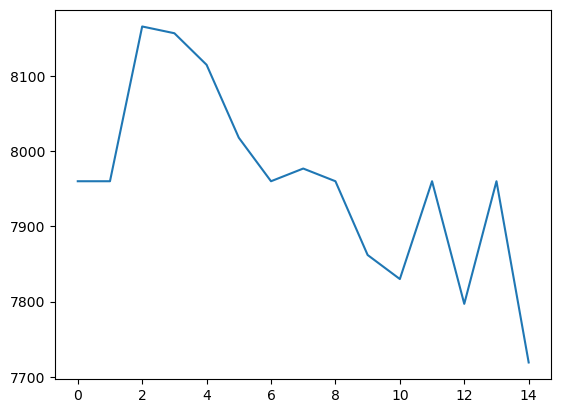

In [28]:
ebola['Cases_Liberia'].fillna(7960.111111111111).plot()

- 선형보강법
- 두 점 사이의 거리를 구하는 공식
- 1차원 두 점 상이의 거리로 해당 누락값을 대체한다

<Axes: >

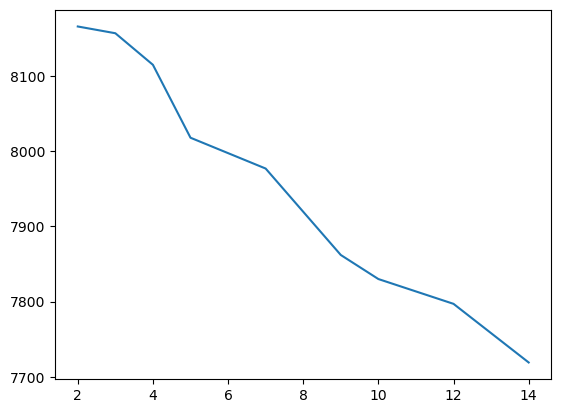

In [29]:
ebola['Cases_Liberia'].interpolate(method = "linear").plot()

<Axes: >

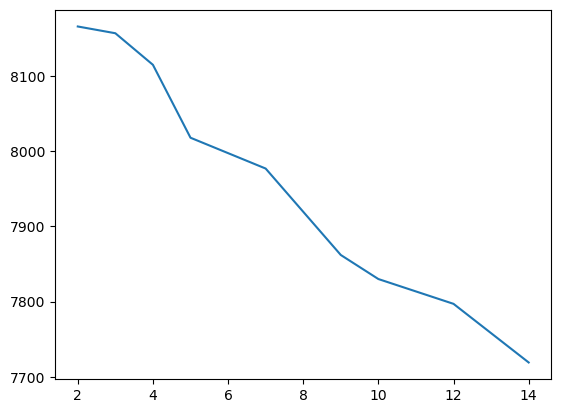

In [30]:
# 1차, 2차, 3차로 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method = "slinear").plot()

<Axes: >

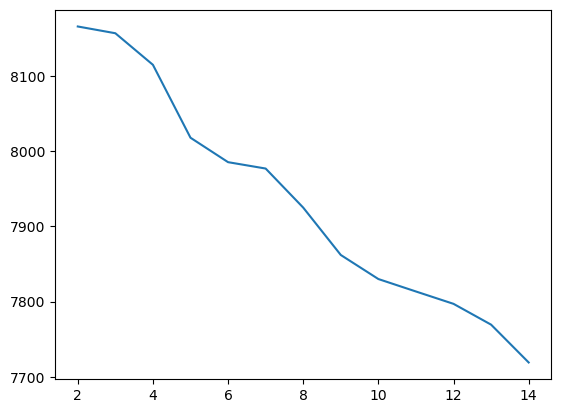

In [31]:
ebola['Cases_Liberia'].interpolate(method = "cubic").plot() 

In [32]:
# spline
# 기존에는 1차원으로 보간을 했다면
# spline으로 통해서 order 차수를 높이면
# 2차원 이상으로 가능

ebola['Cases_Liberia'].interpolate(method = "spline").plot() 

ValueError: You must specify the order of the spline or polynomial.

In [35]:
dfe['Date'] = pd.to_datetime(dfe['Date'])

df_e = dfe.set_index(['Date'])

In [36]:
df_e.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [38]:
df_e.iloc[0:15, 0:5]['Cases_Liberia'].interpolate(method = 'time').to_frame()

,Cases_Liberia
Date,
2015-01-05,NaN
2015-01-04,NaN
2015-01-03,8166.000000
2015-01-02,8157.000000
2014-12-31,8115.000000
2014-12-28,8018.000000
2014-12-27,8007.750000
2014-12-24,7977.000000
2014-12-21,7890.750000


### 필수과제
- bike 데이터를 가지고 위의 보간법을 진행
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지를 체크
- 수업시간 배운 것 외에 2~3가지 정도만 추가로 진행